# Errors in numerical differentiation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Example:

Find the derivative of:

$y(x) = \sin(x)$


We know that:

$y'(x) = \cos(x)$

In [3]:
# define function
def sin_function(t):
    """
    Returns the values of a sine function.
    """
    return np.sin(t)

In [4]:
# Define step size
h = 0.1

# define grid
x = np.arange(-2*np.pi, 2*np.pi, h) 

# compute function
y = np.sin(x) 

In [5]:
# compute vector of forward differences
forward_diff = (sin_function(x + h) - sin_function(x))/(h)

# compute corresponding grid
x_diff = x[:-1] 

# compute exact solution
exact_solution = np.cos(x_diff) 

### Plotting

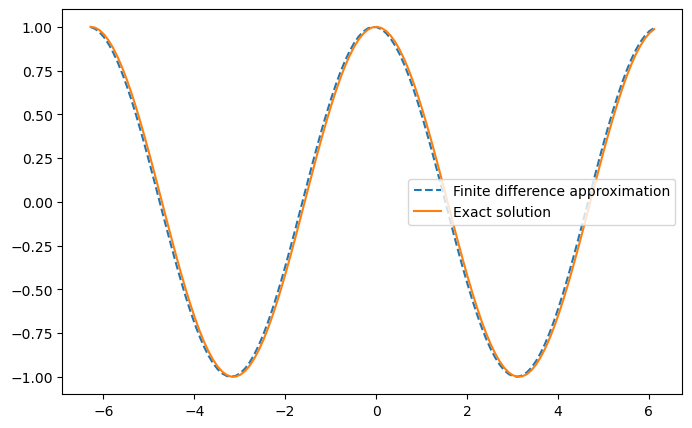

In [6]:
# Figure environment:

plt.figure(figsize = (8, 5))
plt.plot(x_diff, forward_diff[:-1], '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

### Maximum error

In [7]:
# Compute max error between numerical derivative and exact solution

max_error = np.max(np.abs(exact_solution - forward_diff[:-1]))
print(max_error)

0.04997545591097786


### Iterative error calculation

In [14]:
# define step size
h = 1

# define number of iterations to perform
iterations = 22

# list to store our step sizes
step_size = [] 

# list to store max error for each step size
max_error1 = [] 
max_error2 = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    
    # store this step size
    step_size.append(h) 
    
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    
    # compute function value at grid
    y = np.sin(x) 
    
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    central_diff = (sin_function(x + h/2) - sin_function(x - h/2))/(h)
    
    # compute corresponding grid
    x_diff = x[:-1]
    
    # compute exact solution
    exact_solution = np.cos(x_diff) 
    
    # Compute max error between numerical derivative and exact solution
    max_error1.append(np.max(np.abs(exact_solution - forward_diff)))
    max_error2.append(np.max(np.abs(exact_solution - central_diff[:-1])))

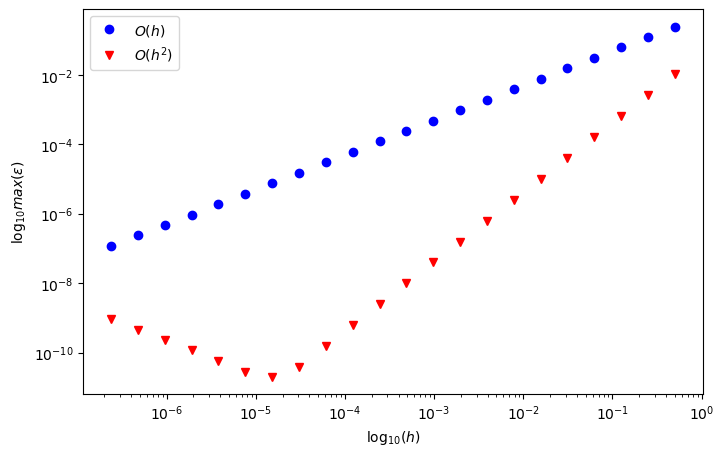

In [15]:
# produce log-log plot of max error versus step size
plt.figure(figsize = (8, 5))
plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.legend()

plt.xlabel(r"$\log_{10}(h)$")
plt.ylabel(r"$\log_{10}max(\epsilon)$")
plt.show()

## Fits to the log-log plots:

In [12]:
# Get coefficients

a1, b1 = np.polyfit(np.log10(step_size), np.log10(max_error1), 1)
a2, b2 = np.polyfit(np.log10(step_size), np.log10(max_error2), 1)

# Print to check
print('slope1 =', a1, ' intercept1 =', b1)
print('slope2 =', a2, ' intercept2 =', b2)

# Get fitting function
fit_max_error1 = a1*np.log10(step_size) + b1
fit_max_error2 = a2*np.log10(step_size) + b2

slope1 = 0.9997792111053004  intercept1 = -0.301956283546799
slope2 = 1.579449510909955  intercept2 = -2.2068441629162976


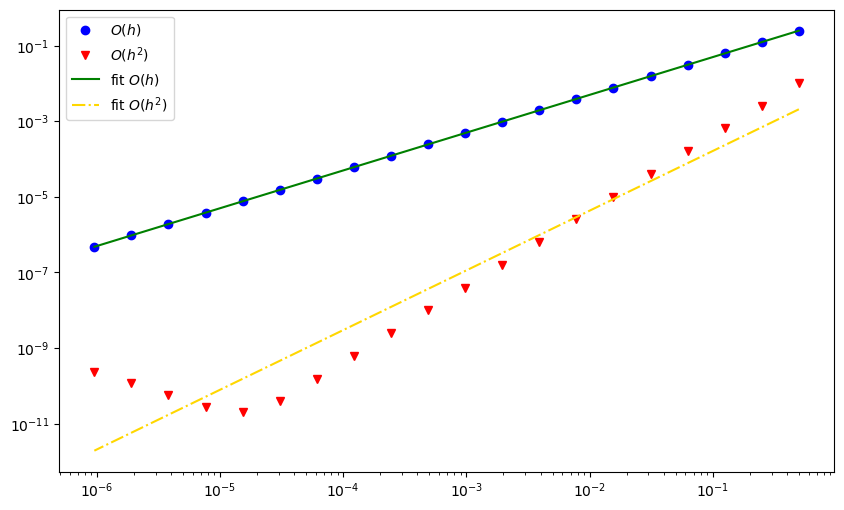

In [13]:
# produce log-log plot of max error versus step size

plt.figure(figsize = (10, 6))

plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.loglog(step_size, 10**fit_max_error1, linestyle = '-', c = 'green', label = r'fit $O(h)$')
plt.loglog(step_size, 10**fit_max_error2, linestyle = '-.', c = 'gold', label = r'fit $O(h^2)$')

plt.legend()
plt.show()